In [16]:
import scipy.integrate as integrate
import scipy.sparse as sparse
import scipy.linalg

import dataclasses
import sys
import numpy as np
from tqdm import tqdm
import matplotlib.animation as animation
sys.path.insert(0,'..')

from src.matrices import get_J_matrix

import matplotlib.pyplot as plt

<h1>02-Use matrices in Diff Eq</h1>
Now we are going to take the matrices for J and H generated previously, and use them as update values to a differential equation

In [127]:
parameters = [{'u'    :0.5
              ,'w'    :0.0
              ,'alpha':1.0
              ,'beta' :0.0
              ,'gamma':0.0}
              
             ,{'u'    :0.0
              ,'w'    :0.0
              ,'alpha':1.0
              ,'beta' :1.0
              ,'gamma':1.0}
              
             ,{'u'    :0.5
              ,'w'    :0.0
              ,'alpha':1.0
              ,'beta' :1.0
              ,'gamma':1.0}
              
             ,{'u'    :0.5
              ,'w'    :0.5
              ,'alpha':1.0
              ,'beta' :1.0
              ,'gamma':1.0}]

N = 200
u, w, alpha, beta, gamma = parameters[2].values()
matrix = get_J_matrix(N,**parameters[2])

In [128]:
lambs, vecs = scipy.linalg.eig(np.array(matrix))

In [129]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [130]:
def differential_equation(r,t,in_array,tau):
    def activation(x):
        out = np.zeros(x.shape)
        out[(x + 1) < 0]  = 0.0
        out[(x + 1) >= 0] = x + 1
        return out
    
    def in_array(t):
        
        return 0.0
    
    interactions = np.array(matrix @ r).squeeze()
    
    thing = activation(interactions + in_array(t))
    out = (-r + thing.squeeze())/tau
#     print(thing.shape,out.shape)
    return out

In [131]:
tau = 1
tspace = range(100)
r0 = np.zeros(N)
r0[:N//4] = 1.0
in_array = np.zeros((len(tspace),*r0.shape))
results = integrate.odeint(differential_equation,r0,tspace,(in_array,tau))

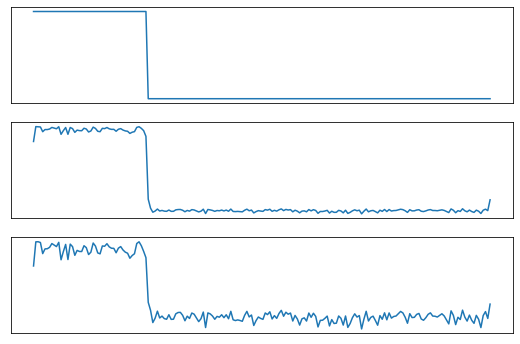

In [132]:
n_imgs = 3
strt_img = 0

fig, axs = plt.subplots(n_imgs,figsize=(3*n_imgs,6))
# metrics = np.zeros((len(kernels),*image.shape))
for index,img_i in enumerate(range(strt_img,n_imgs+strt_img)):

    axs[index].plot(results[img_i,...])
    axs[index].set_xticks([])
    axs[index].set_yticks([])
        
plt.show()

In [133]:
eig_n = 10
ordered_inds = np.argsort(lambs.real)
vecs_sp = vecs[:,ordered_inds[:eig_n]]

In [134]:
vecs_sp.shape

(200, 10)

102it [00:06, 15.74it/s]                         


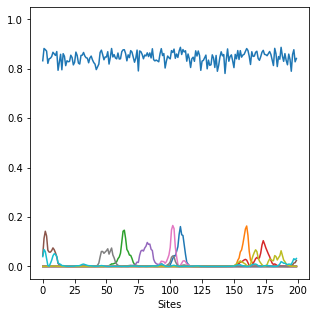

In [135]:
fig, ax = plt.subplots(figsize=(5, 5))

for iii in range(eig_n):
    ax.plot(np.abs(vecs_sp[:,iii])**2)

line, = ax.plot(results[0,...])
# ax.axis('equal')
ax.set_xlabel('Sites')


orders = np.arange(0,len(tspace),dtype=int)
with tqdm(total=len(tspace)) as pbar:
        
    def next_image(index):
        
        line.set_ydata(results[index,...])
#         ax.set_title("{}".format(tim_stack[index]))
        pbar.update(1)
        
        return line,
            
    ani = animation.FuncAnimation(
        fig,
        next_image,
        frames=orders,
        interval=200,
        repeat=False,
        repeat_delay=100,
        blit=True
    )
#     plt.show()

    ani.save(
        "diffeqJ_u{}_w{}_a{}_b{}_g{}.mp4".format(u,w,alpha,beta,gamma)
    )